In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
d = pd.read_csv('df_to_machine_learning.csv', index_col=False).drop('uid', axis=1)

In [25]:
d
# Fréquence de remplissage : pente
# nb like/dislike commentaire personne absente ? oui / non
# évolution longueur commentaire : croissant / égal / décroissant : pente : OK
# biais du pb : nb vote == longévité, partir != mécontent 
# précision / rappel / courbe roc / matrice confusion
# graph stillExists avec les autres features.

,numVotes,stillExists,liked,disliked,vote,likes,dislikes,txt_len
0,4,True,6,0,2.500000,7.500000,1.000000,114.500000
1,72,True,60,12,2.250000,5.428571,4.785714,59.571429
2,14,False,1,0,3.142857,6.000000,0.000000,92.000000
3,14,False,1,0,3.142857,6.000000,0.000000,92.000000
4,22,True,6,5,3.454545,3.333333,0.888889,85.555556
...,...,...,...,...,...,...,...,...
2585,4,True,11,0,2.750000,1.000000,0.500000,56.500000
2586,3,True,8,4,3.666667,10.333333,0.000000,115.333333
2587,5,True,28,8,2.600000,10.666667,5.666667,87.000000
2588,1,True,1,0,4.000000,15.000000,0.000000,386.000000


<AxesSubplot:>

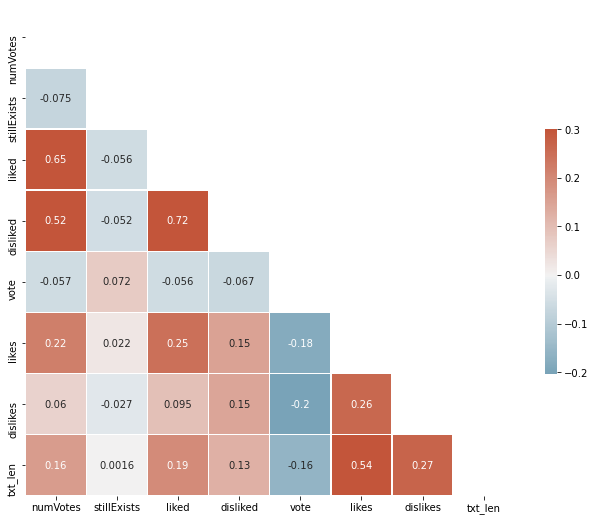

In [26]:
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [27]:
from sklearn.model_selection import train_test_split


X = d.drop(columns=['stillExists'])
y = d[['stillExists']]

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.9, test_size=.1, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=10, random_state=0).fit(X_train, y_train)
clf.score(X_train, y_train)

/home/osboxes/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9227799227799228

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
